reconstruction based on d = 1, 10, 20, 100:


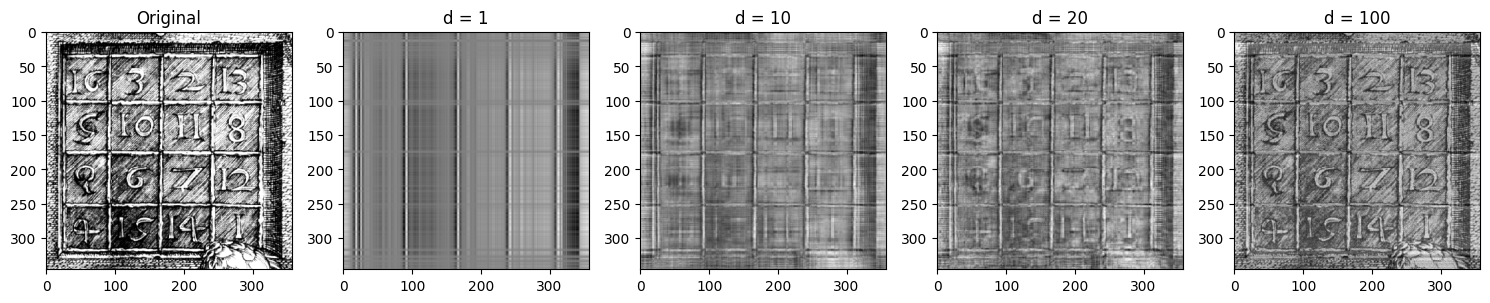

reconstruction error and compression ratio:


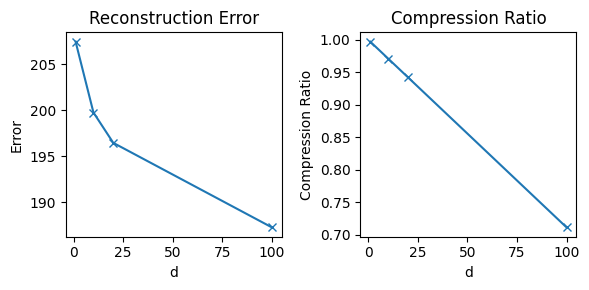

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.io 
def PCA(X, d):
    '''
    Inputs:
        X: (p, n) p is #features, n is #data points
        d: number of principal components to keep
    Outputs:
        V: (p, d)
        X_reduced: (d, n)
    '''
    X_bar = X - X.mean(axis = 1, keepdims = True)
    U, s, V = np.linalg.svd(X_bar)
    X_reduced = U[:, :d].T @ X_bar
    return U[:, :d], X_reduced, s, V
    
data = scipy.io.loadmat('numbers.mat')['mat']


print('reconstruction based on d = 1, 10, 20, 100:')
plt.figure(figsize=(15, 3))
plt.subplot(1,5,1)
plt.imshow(data, cmap = "gray")
plt.title("Original")
error = []
compression = []
for i, d in enumerate([1, 10, 20, 100]):
    pca_directions, pca_components, s, V = PCA(data, d)
    
    error.append(np.linalg.norm(data - pca_directions@pca_components))
    compression.append(1 - pca_components.size/data.size)
    plt.subplot(1,5,i+2)
    plt.imshow(pca_directions@pca_components, cmap = "gray")
    plt.title("d = {}".format(d))
    
plt.tight_layout()
plt.savefig('Q5_reconstruction.png')
plt.show()

print('reconstruction error and compression ratio:')
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.plot([1, 10, 20, 100], error, 'x-')
plt.title("Reconstruction Error")
plt.xlabel("d")
plt.ylabel("Error")
plt.subplot(1, 2, 2)
plt.plot([1, 10, 20, 100], compression, 'x-')
plt.title("Compression Ratio")
plt.xlabel("d")
plt.ylabel("Compression Ratio")
plt.tight_layout()
plt.savefig('Q5_error.png')
plt.show()


In [3]:
print('error:')
print([float('{:.2f}'.format(e)) for e in error]) 
print('compression ratio:')
print([float('{:.2f}'.format(c)) for c in compression])

error:
['207.47', '199.76', '196.46', '187.27']
compression ratio:
[0.9971098265895953, 0.9710982658959537, 0.9421965317919075, 0.7109826589595376]
